# Guía 1: Ejercicio 1

Se tiene una muestra que contiene un isótopo radiactivo desconocido. Se realizan mediciones de la actividad con un instrumento de detección cuya eficiencia es del 100%. Se obtiene la siguiente tabla:

| Tiempo [min]  |   Actividad [MBq]|
| -- | ---- |
| 5  | 40.4 |
| 10 | 28.3 |
| 15 | 19.8 |
| 20 | 13.9 |
| 25 | 9.7  |


1. ¿Cuál es la actividad extrapolada a tiempo cero (en cpm, Ci, Bq)?
2. ¿Cuáles podrían ser los radioisótopos contenidos en la muestra?
3. ¿En cuánto tiempo la actividad decaerá a 1.0 MBq?
4. ¿Cuántos núcleos del radioisótopo había a tiempo cero? ¿Cuánta masa poseían en ese momento? 
5. ¿Cuántos átomos tendrá la muestra a los 25 minutos? ¿Qué elementos contendrá y en qué proporción?

In [42]:
import numpy as np
import pint

%pylab inline
u = pint.UnitRegistry()
u.setup_matplotlib()

Populating the interactive namespace from numpy and matplotlib


### Definición de los vectores con los datos

In [43]:
tiempo = np.array([5.0, 10, 15, 20, 25]) * u('min')
actividad = np.array([40.4, 28.3, 19.8, 13.9, 9.7]) * u('MBq')

Mostramos los vectores

In [44]:
print(tiempo, actividad)

[ 5. 10. 15. 20. 25.] minute [40.4 28.3 19.8 13.9  9.7] megaBq


También podemos mostrarlos directamente con sus nombres

In [45]:
tiempo

array([ 5., 10., 15., 20., 25.]) <Unit('minute')>

In [46]:
actividad

array([40.4, 28.3, 19.8, 13.9,  9.7]) <Unit('megaBq')>

Es muy facil convertir la actividad en otras unidades

In [47]:
actividad.to('mCi')

array([1.09189189, 0.76486486, 0.53513514, 0.37567568, 0.26216216]) <Unit('millicurie')>

Podemos graficar

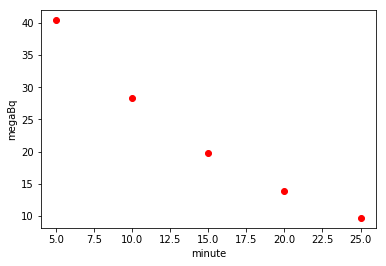

In [48]:
plot(tiempo, actividad.to('MBq'), 'ro')

Eso no sabemos si es una exponencial decreciente o no. Vamos a suponer
que sí lo es, calculamos entonces los parámetros desconocidos de la función $A(t) =
A_0 \cdot e^{- \lambda \cdot t}$, que son $A_0$ y $\lambda$. 

A continuación escribimos las ecuaciones para t=4 horas y para t=8:

$A(4) = A_0 \cdot e^{- \lambda \cdot 4}$

$A(8) = A_0 \cdot e^{- \lambda \cdot 8}$

Haciendo el cociente y despejando $\lambda$ se tiene que
$\lambda = \frac{1}{4} \cdot \ln{\frac{A(4)}{A(8)}}$. Lo calculamos:

In [49]:
t1= 4 * u('hours')
A1= 852 * u('Ci')
t2= 8 * u('hours')
A2= 712 * u('Ci')

delta_t = t2 - t1

ctte_lambda = (1/delta_t) * np.log(A1/A2)

ctte_lambda

0.044877153854334974 <Unit('1 / hour')>

Podemos despejar $A_0 = \frac{A(t)}{e^{- \lambda \cdot t}} $

In [50]:
t0= 4 * u('hours')
A0 = A1 / np.exp(-ctte_lambda * t0)
A0

1019.5280898876404 <Unit('curie')>

In [51]:
def act(A0, k, t):
    # print A0, k, t              # para debug
    return A0 * np.exp(-k * t)

In [52]:
t = np.linspace(0,50,51) * u('hours')
t[1]

1.0 <Unit('hour')>

In [53]:
una_act = act(A0,ctte_lambda,t[2])
una_act

932.007474532404 <Unit('curie')>

In [54]:
una_act.to_base_units()

34484276557698.95 <Unit('1 / second')>

In [55]:
magnitud = una_act.to_base_units().magnitude
t[1].to_base_units().units

<Unit('second')>

In [56]:
t[0].to_base_units().magnitude

0.0

In [57]:
t[1].to_base_units().units

<Unit('second')>

In [58]:
vector_a = A0 * np.exp(-ctte_lambda * t)

In [59]:
vector_a

array([1019.52808989,  974.78602794,  932.00747453,  891.10626095,
        852.        ,  814.60992006,  778.86070642,  744.68034953,
        712.        ,  680.75382991,  650.8789002 ,  622.31503388,
        595.00469484,  568.89287195,  543.92696824,  520.05669498,
        497.23397033,  475.41282257,  454.5492974 ,  434.60136951,
        415.52885784,  397.29334468,  379.8580983 ,  363.18799893,
        347.24946805,  332.01040072,  317.44010093,  303.50921977,
        290.18969631,  277.45470107,  265.27858199,  253.63681276,
        242.50594339,  231.86355301,  221.68820467,  211.95940221,
        202.65754894,  193.76390815,  185.26056541,  177.13039246,
        169.35701273,  161.92476831,  154.81868846,  148.02445943,
        141.52839561,  135.31741201,  129.37899787,  123.70119145,
        118.27255596,  113.08215652,  108.11953813]) <Unit('curie')>

In [60]:
a = np.array([act(A0,ctte_lambda,horas) for horas in t])

ValueError: setting an array element with a sequence.

In [36]:
for horas in t:
    # print(horas)
    print(act(A0,ctte_lambda,horas))

1019.5280898876404 curie
974.7860279420429 curie
932.007474532404 curie
891.1062609484956 curie
852.0 curie
814.6099200642425 curie
778.8607064167508 curie
744.6803495250339 curie
712.0 curie
680.7538299128412 curie
650.8789001980358 curie
622.3150338753804 curie
595.0046948356808 curie
568.8928719459424 curie
543.9269682406123 curie
520.0566949756701 curie
497.2339703321652 curie
475.4128225651539 curie
454.5492974029529 curie
434.6013695101844 curie
415.5288578362696 curie
397.293344678861 curie
379.85809829918134 curie
363.1879989333936 curie
347.24946805096704 curie
332.01040071754585 curie
317.4401009260764 curie
303.5092197659346 curie
290.18969630550305 curie
277.4547010691228 curie
265.27858199456153 curie
253.63681276214248 curie
242.50594339145326 curie
231.86355300612146 curie
221.68820467151156 curie
211.95940221437266 curie
202.65754893745859 curie
193.76390814596064 curie
185.26056540623972 curie
177.13039246083721 curie
169.35701272707811 curie
161.92476830976992 curie
1

In [37]:
a = np.array([act(A0,ctte_lambda,horas) for horas in t])
plot(t,a)
plot(tiempo, actividad,'ro')

ValueError: setting an array element with a sequence.

In [38]:
actividad = 10 * u('Ci')

In [39]:
actividad

10 <Unit('curie')>

In [40]:
actividad.to('1/s')

370000000000.0 <Unit('1 / second')>